# Model 1 - Horizontal stratigraphic

This is the most simpel model of horizontally stacked layers. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [2]:
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = os.pardir+"/data/input_data/jan_models/model1_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model1_surface_points.csv") 

Active grids: ['regular']


Setting and ordering the units and series:

In [3]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock2,Strat_Series,1,False,#015482,1
1,rock1,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


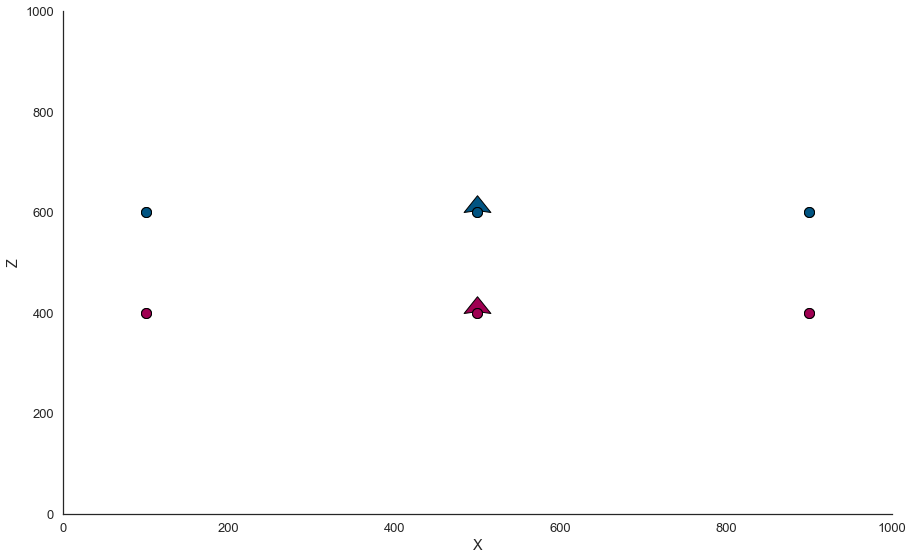

In [4]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [5]:
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_compile')

Compiling theano function...


/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/gof/cc.py:968: UserWarning: Your g++ compiler fails to compile OpenMP code. We know this happen with some version of the EPD mingw compiler and LLVM compiler on Mac OS X. We disable openmp everywhere in Theano. To remove this warning set the theano flags `openmp` to False.
  ret += x.c_compile_args()


Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [6]:
interp_data.theano_graph.number_of_points_per_surface_T.get_value()

array([5, 5], dtype=int32)

In [7]:
sol = gp.compute_model(geo_data)

Displaying the result in x and y direction:

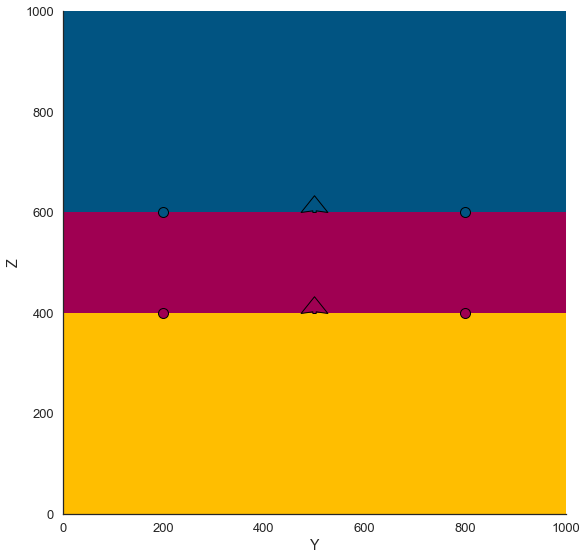

In [8]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='x', show_data=True)

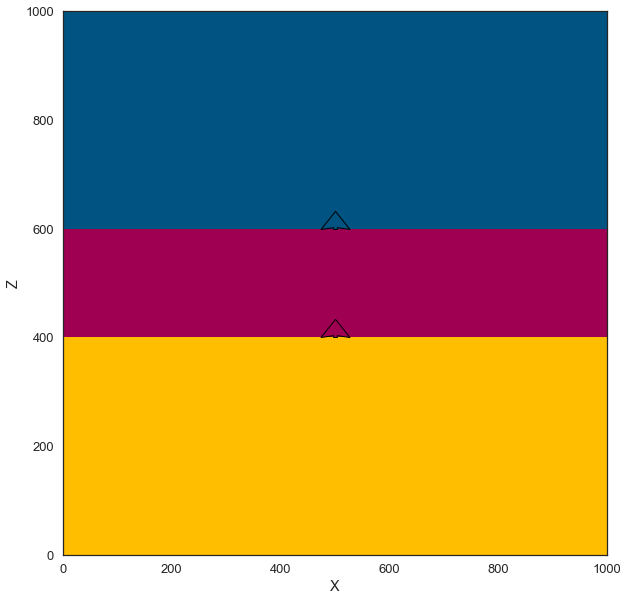

In [9]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                    direction='y', show_data=True)